In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [4]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res


def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err


def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W)  
    return W

In [5]:
X_st = X.copy().astype(np.float64)

for i in range(X_st.shape[0]):
    if i != 0:
        X_st[i] =  calc_std_feat(X_st[i])
      
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [6]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

In [9]:
n = 40
coef = np.zeros((n, X_st.shape[0]))
lambdas = np.logspace(-5, 1, n)
for i, val in enumerate(lambdas):
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-4, lambda_=val)
    coef[i, :] = W

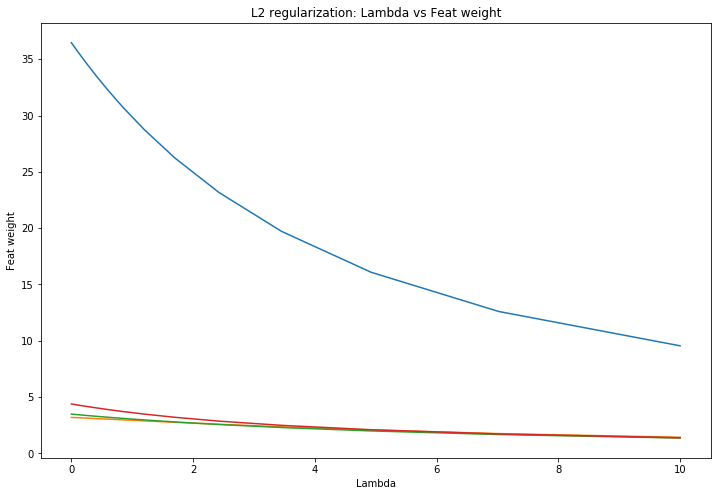

In [10]:

plt.figure(figsize=(12,8))
for i in range(X_st.shape[0]):
    plt.plot(lambdas, coef[:, i])
plt.title('L2 regularization: Lambda vs Feat weight')
plt.xlabel('Lambda')
plt.ylabel('Feat weight')
plt.show()

###   2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?


При нормализации диапазон значений будет в интервале от 0 до 1. При стандартизации мы получаем сдвиг признака от среднего, т.е. значения будут распологаться вокруг 0. Т.е. одновременно применять оба метода одновременно нельзя.

### 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [11]:

def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        if 0 in W:
            break
        else:
            W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W / abs(W)) 
        if i % (iterations / 10) == 0:
            print(W, err)
    return W

In [12]:
eval_model_reg1(X_st, y, iterations=100000, alpha=1e-4, lambda_=1e-5)

[49.70051363  3.66420465  3.48134702  4.46121443] 100.15761453508046
[56.35819192  4.16639214  3.16716853  4.31396919] 41.56251263591538
[57.25903048  4.55411509  2.8909159   4.20542692] 40.257150216783614
[57.38092134  4.86183217  2.65763359  4.13342406] 40.082709013331375
[57.39741418  5.10672093  2.46089897  4.08738302] 39.981162830730725
[57.39964579  5.3021156   2.29515503  4.0595593 ] 39.91448312277951
[57.39994775  5.4584199   2.15564595  4.04433687] 39.87019861665916
[57.39998861  5.58377038  2.03831332  4.03766797] 39.840572034632274
[57.39999413  5.68454595  1.93970244  4.0366566 ] 39.820624517318436
[57.39999488  5.76576001  1.85687883  4.03924952] 39.80711851884131


array([57.39999488,  5.76576001,  1.85687883,  4.03924952])